# Multi-Threading vs Multi-Processing

This notebook covers examples of using multi-threading and multi-processing in python code to improve exection time, including examples of when its quickest to use multiple threads, processes or a combination.

### The multi-threaded kitchen: understanding threads and processes

Imagine you were running a kitchen with 3 meal orders, what would be the most efficient way to cook the meals?

- Method 1 (_Single threaded_): Have a single chef follow the reciepe for each meal step by step. They start with the step of meal one, toasting some bread, then step two buttering it, and so on. Once meal one is finished they start with step one of meal two (boiling some water), then step two... until all three meals are cooked. This ensures the meals are cooked but is clearly a slow approach


- Method 2 (_Multi-threaded_): Have a single chef follow the reciepe for all three at the same time. Instead of doing each meal sequentially, they look for opportunities to pick up parts of each meal concurrently. So whilst waiting for the bread to toast in meal one step one, they start boiling the water for meal two step one, and chop the vegetables for meal three step one whilst waiting for both of those step to complete. Using opportunities to complete steps in each meal whilst waiting for steps in others to complete allows for the three meals to be cooked more quickly.


- Method 3 (_Multi-processed_): Have three chefs follow the reiepe for one of the meals each. Fully parallelise the cooking of each meal by having different chefs cook each meal at the same time. Chef 1 follows the reciepe for meal 1 step by step, chef 2 follows the reciepe for meal 2 step by step etc. This allows the three meals to be cooked at the same time and arrive more quickly


It is clear that method 1 would be a slow approach to completeing these meals, and methods 2 and 3 offer good ways to improve the efficiency of how the food is cooked.

Which out of method 2 and 3 is preferable will depend on the kind of meals being prepared:

- _I/O bound meals_: If each meal involves steps with long wait times (such as boiling water or waiting for something to roast), then method 2 can be a efficient as method 3: a single chef can likely efficiently handle all meals as well as multiple chefs. Even though they only do a single step of a reciepe at a time, due to the waiting times they can efficiently complete steps for all meals at the same time


- _cpu bound meals_: If each meal involves steps with lots of hands on tasks (lots of chopping and peeling for example) then method 3 will have an advanage over method 2: multiple chefs will be more efficient than a single chef. A single chef can only do one step at a time, so can only chop vegetables for meal two after finishing the chopping for meal one, whereas multiple chefs can chop for each meal simultaneously


Here method 2 represents multi-threading in Python: in this case a single cpu splits tasks into multiple threads. Even though it can only work on a single thread at a time, for some programs (those be described below as I/O bound) it will be the most efficient approach. 

Method 3 represented multi-processing in Python: in this case tasks are split over multiple cpus, which work on tasks in parallel. For some programs (those described below as cpu bound), this will be the most efficient approach.

### Some definitions

**Multi-threading**: The ability for a single cpu to provide multiple threads of execution concurrently. Processing power is increased by splitting a single processes in multiple threads.

**Multi-processing**: The ability for a system to use more than one cpu on parallel. Processing power is increased by using additional cpu cores to run multiple processes.

**Cpu bound**: a program is cpu bound if its speed of execution is limited by the speed of cpu. A quicker cpu would allow quicker exection of a cpu bound program. Programs that are computation heavy, such lots of mathematical calculations is likely to be cpu bound.

**I/O bound**: a program is I/O bound if its speed of execution is limited by input/output operations. The ability to more quickly read/write data to disk or recieve data from a server would allow quicker execution of an I/O bound program. Programs that involve writing or reading large objects to/from external servers are likely to be I/O bound.

As mentioned, multi-threading is like having a single chef work on multiple meals at once. If a program is I/O bound, a cpu can use waiting time on one thread to work on a different thread. Multi-processing is like having multiple chefs work on different meals: each chef can work on their meals at the same time.

### Some key differences

#### The GIL
A central difference between using threads and processes in Python comes down to the Global Interpreter Lock (GIL): the GIL means that only on thread in a process is ever executed at a time. So whilst a process might be split into multiple threads, Python will only be executing code in one thread at any time. Multi-processing is a way around the GIL, by splitting multiple processes over different cpus, threads on each of those cpus can be executed at the same time.

This has consequences for the type of programs that either addtional processes or threads are most effective for:
- multi-processing is likely to be most effective for a cpu bound program, as additional cpus can be used to execute computations in parallel. The GIL means that even using multiple threads, calcuations can only be executed in one thread at a time
- multi-threading is likely to be most effective for an I/O bound program, as multiple threads as the wait time for multiple I/O operations can be executed concurrently  

#### Memory
Multiple threads use the same memory space, so objects can be shared between threads more easily (similar to how a single chef has access to the same workspace). The downside to a shared memory space is the possibility of _race conditions_: as threads access the same objects, unexpected behaviour can happen if they are accessing and updating values at the same time. 

Multiple processes each have their own copies of objects in their own memory space. As a result, they avoid race conditions. On the downside, sharing objects is more complicated and there is more memory overhead involved with processes, partially meaning spawning new processes is slower than spawning new threads.

## Testing multiple processes and threads in different kinds of programs

In [33]:
import time
import requests
# for multi-threading
from multiprocessing.pool import ThreadPool
# for multi-processing (the multiprocess fork of multiprocessing works better in jupyter notebooks)
from multiprocess.pool import Pool
# for combining both multi-threading and multi-processing
from fast_map import fast_map
import matplotlib.pyplot as plt

### CPU Bound Program

Below is cpu bound function that relies on the speed of cpu computation

In [37]:
# a cpu bound function that returns a number raised to the power of itself
def cpuBoundFunction(x):
    return x**x

##### Single threaded

In [40]:
start = time.perf_counter()

# running a single threaded program over the values 0-19999
results = list(map(cpuBoundFunction, range(20000)))
  
finish = time.perf_counter()
print(f"Finished in {round(finish-start, 2)} seconds")

Finished in 47.21 seconds


#####  Multi-Threading

In [6]:
start = time.perf_counter()

# executing the calcuations with multiple threads
threading = ThreadPool()
results = list(threading.map(cpuBoundFunction, range(20000)))

finish = time.perf_counter()
print(f"Finished in {round(finish-start, 2)} seconds")

Finished in 36.41 seconds


#####  Multi-Processing

In [7]:
start = time.perf_counter()

# executing the calculations with multiple processes
processing = Pool()
results = list(processing.map(cpuBoundFunction, range(20000)))

finish = time.perf_counter()
print(f"Finished in {round(finish-start, 2)} seconds")

Finished in 28.72 seconds


Whilst both additional threads and processes give a good speed improvement over single threaded programs, multi-processing executes the most quickly as expected, despite the additional time required to spawn processes

##### Benchmarking

In [38]:
x_values = range(0, 20000, 2000)
single_y = []
threads_y = []
processes_y = []

for x in x_values:
    start = time.perf_counter()
    vids = list(map(cpuBoundFunction, range(x)))
    finish = time.perf_counter()
    single_y.append(round(finish-start, 2))

for x in x_values:
    start = time.perf_counter()
    threading = ThreadPool()
    vids = list(threading.map(cpuBoundFunction, range(x)))
    finish = time.perf_counter()
    threads_y.append(round(finish-start, 2))

for x in x_values:
    start = time.perf_counter()
    processing = Pool()
    vids = list(processing.map(cpuBoundFunction, range(x)))
    finish = time.perf_counter()
    processes_y.append(round(finish-start, 2))

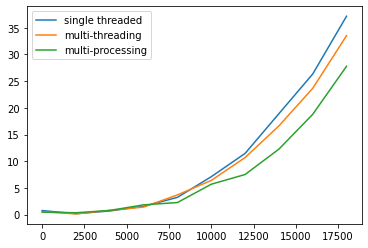

In [39]:
plt.plot(x_values, single_y, label = "single threaded")
plt.plot(x_values, threads_y, label = "multi-threading")
plt.plot(x_values, processes_y, label = "multi-processing")
plt.legend()
plt.show()

### IO Bound Program

Below is an I/O bound function, that requires downloading a video. Note that the requests library is passed as an argument in the function, to ensure each process can access it in their memory space (otherwise the multi-processing code wont run in jupyter)

In [8]:
# an I/O bound program that downloads content from a url
def IOBoundFunction(url, requests=requests):
    return requests.get(url)

In [23]:
# a youtube video url
url = 'https://www.youtube.com/watch?v=m4-HM_sCvtQ&ab_channel=Fireship'

##### Single threaded

In [32]:
start = time.perf_counter()

# getting the video response 20 times in a single threaded program
vids = list(map(IOBoundFunction, [url]*20))
  
finish = time.perf_counter()
print(f"Finished in {round(finish-start, 2)} seconds")

Finished in 21.3 seconds


#####  Multi-Threading

In [4]:
start = time.perf_counter()

# multi-threading the 20 requests
threading = ThreadPool()
results = list(threading.map(IOBoundFunction, [url]*20))

finish = time.perf_counter()
print(f"Finished in {round(finish-start, 2)} seconds")

Finished in 4.13 seconds


##### Multi-Processing

In [5]:
start = time.perf_counter()

# multi-processing the 20 requests
processing = Pool()
results = list(processing.map(IOBoundFunction, [url]*20))
  
finish = time.perf_counter()
print(f"Finished in {round(finish-start, 2)} seconds")

Finished in 4.35 seconds


Whilst both threading and processing give a good speed improvement over single threaded programs, multi-threading executes slightly more quickly: due to the I/O bound nature of the function, threading can execute as quickly as multiple processes without the additional overhead involved in spawning processes 

##### Benchmarking

In [10]:
x_values = range(0, 500, 50)
single_y = []
threads_y = []
processes_y = []

In [11]:
for x in x_values:
    start = time.perf_counter()
    vids = list(map(IOBoundFunction, [url]*x))
    finish = time.perf_counter()
    single_y.append(round(finish-start, 2))

In [12]:
for x in x_values:
    start = time.perf_counter()
    threading = ThreadPool()
    vids = list(threading.map(IOBoundFunction, [url]*x))
    finish = time.perf_counter()
    threads_y.append(round(finish-start, 2))

In [14]:
for x in x_values:
    start = time.perf_counter()
    processing = Pool()
    vids = list(processing.map(IOBoundFunction, [url]*x))
    finish = time.perf_counter()
    processes_y.append(round(finish-start, 2))

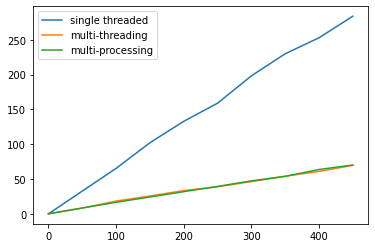

In [18]:
plt.plot(x_values, single_y[-10:], label = "single threaded")
plt.plot(x_values, threads_y, label = "multi-threading")
plt.plot(x_values, processes_y[-10:], label = "multi-processing")
plt.legend()
plt.show()

### What about a program that is both cpu and i/o bound?

Often there isn't a clear benefit to using both threads and processes, but in some cases, such as for cpu and I/O bound programs, it might be useful

In [22]:
# an I/O and cpu bound program that downloads content from a url and calculates numbers raised to the power of themselves
def cpuAndIOBoundFunction(i, url=url, requests=requests):
    response = requests.get(url)
    val = i*i
    return (val, response)

##### Single threaded

In [45]:
start = time.perf_counter()

# 50 iterations of the cpu and I/O bound function in a single threaded approach
result = list(map(cpuAndIOBoundFunction, range(1000, 1050)))
  
finish = time.perf_counter()
print(f"Finished in {round(finish-start, 2)} seconds")

Finished in 52.02 seconds


##### Multi-Threading

In [62]:
start = time.perf_counter()

# 50 iterations in a multi-threaded approach
threading = ThreadPool()
result = list(threading.map(cpuAndIOBoundFunction, range(1000, 1050)))
  
finish = time.perf_counter()
print(f"Finished in {round(finish-start, 2)} seconds")

Finished in 14.52 seconds


##### Multi-Processing

In [47]:
start = time.perf_counter()

# 50 iterations in a multi-processes approach
processing = Pool()
result = list(processing.map(cpuAndIOBoundFunction, range(1000, 1050)))
  
finish = time.perf_counter()
print(f"Finished in {round(finish-start, 2)} seconds")

Finished in 16.96 seconds


##### fast_map to combine processes and threads

fast_map doesn't seem to work in jupyter notebooks, as demonstrated below (this is seems to be related to access to objects in different processes memory)

In [24]:
if __name__ == '__main__':
    start = time.perf_counter()
    result = [i for i in fast_map(cpuAndIOBoundFunction, range(1000, 1050))]
    finish = time.perf_counter()
    print(f"Finished in {round(finish-start, 2)} seconds")

Finished in 0.71 seconds


In [25]:
result

[]

The same code is in the local fast_map_example.py file, which we can see executes more quickly than processing or threading

In [31]:
!type fast_map_example.py

import time
import requests
from fast_map import fast_map

# a youtube video url
url = 'https://www.youtube.com/watch?v=m4-HM_sCvtQ&ab_channel=Fireship'

# an I/O and cpu bound program that downloads content from a url and calculates numbers squared
def cpuAndIOBoundFunction(i, url=url, requests=requests):
    response = requests.get(url)
    val = i*i
    return (val, response)

if __name__ == '__main__':
    start = time.perf_counter()
    result = [i for i in fast_map(cpuAndIOBoundFunction, range(1000, 1050))]
    finish = time.perf_counter()
    print(f"Finished in {round(finish-start, 2)} seconds. Length of results = {len(result)}")


In [32]:
!python fast_map_example.py

Finished in 2.19 seconds. Length of results = 50
